In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from collections import Counter

In [4]:
def q_peg(qc, coin_qubit, path_qubit):
    """
    Applies a single quantum peg operation.

    Args:
        qc (QuantumCircuit): The main quantum circuit.
        coin_qubit (int): The index of the qubit used for the 'coin flip'.
        path_qubit (int): The index of the qubit representing the next step in the path.
    """
    qc.h(coin_qubit)
    qc.cx(coin_qubit, path_qubit)

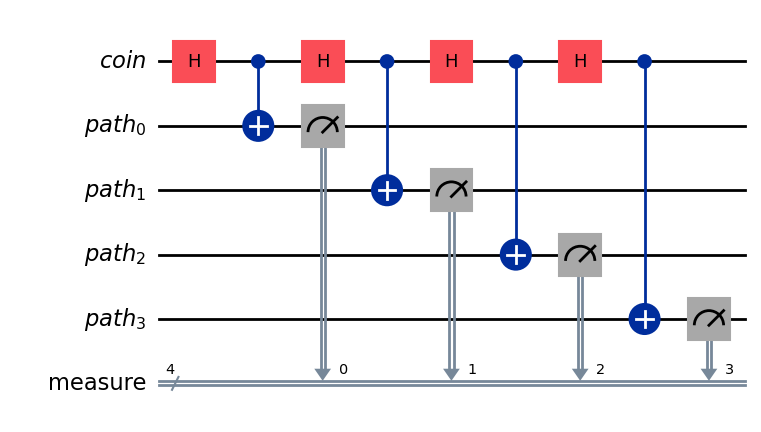

In [6]:
def qgb_circuit(n_levels):
    """
    Creates the full Quantum Galton Board circuit.

    Args:
        n_levels (int): The number of peg levels in the board.

    Returns:
        QuantumCircuit: The complete QGB circuit.
    """
    # need n_levels for path and 1 for coin
    coin = QuantumRegister(1, name='coin')
    path = QuantumRegister(n_levels, name='path')
    # measure the path qubits to see final distribution
    measurement = ClassicalRegister(n_levels, name='measure')

    qc = QuantumCircuit(coin, path, measurement)

    # apply pegs
    for i in range(n_levels):
        q_peg(qc, coin[0], path[i])

    # measure path qubits to determine final bin
    qc.measure(path, measurement)

    return qc

n_levels = 4
qgb_circuit = qgb_circuit(n_levels)
qgb_circuit.draw('mpl')

In [7]:
simulator = AerSimulator()

shots = 8192
job = simulator.run(qgb_circuit, shots=shots)
result = job.result()
counts = result.get_counts(qgb_circuit)

print("Simulation results (bitstrings):")
print(counts)

Simulation results (bitstrings):
{'0010': 539, '1011': 495, '0101': 523, '0110': 526, '1111': 468, '1010': 566, '1001': 530, '1000': 485, '0111': 489, '0100': 512, '0000': 524, '1101': 528, '1100': 492, '0011': 531, '1110': 500, '0001': 484}


[(0, 524), (1, 2020), (2, 3168), (3, 2012), (4, 468)]


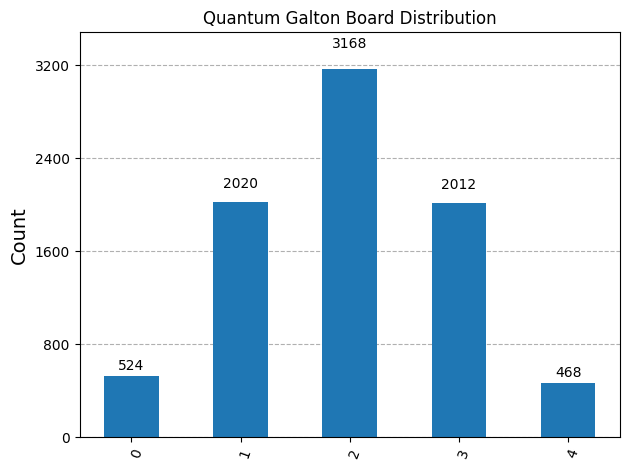

In [8]:
def post_process(counts):
    """
    Converts raw bitstring counts into final bin counts.
    The bin number is simply the number of '1's in the bitstring.
    """
    bin_counts = Counter()
    for bitstring, count in counts.items():
        # The bitstrings are read from right to left in Qiskit
        # '0001' means the 0th qubit was 1.
        final_bin = bitstring.count('1')
        bin_counts[final_bin] += count
    return bin_counts

final_bins = post_process(counts)

print(sorted(final_bins.items()))

plot_histogram(final_bins, title='Quantum Galton Board Distribution')